In [1]:
import json

In [2]:
#df = json.loads('log_220501_072557.txt')


data = []
with open('log_220501_072557.txt', 'r') as f:
    for line in f:
        if line == '\n':
            continue
        data.append(json.loads(line))
        #if count == 100:
            #break
    #data = json.load(f)
    #print(data)


In [3]:
print(data[1])

[{'deviceId': '62679c4c049d1b001d608aa1_24', 'timestamp': 57.84, 'sensors': [{'id': 1651027704096, 'type': 31, 'input': {'pulseOxygen': [175, 95]}}, {'id': 1651027439566, 'type': 27, 'input': {'location': [319.8833, 939.4402]}}, {'id': 1651028054864, 'type': 24, 'input': {'temperature': 23.03848}}]}]


In [4]:
import pandas as pd

df = pd.json_normalize(data[2])

In [5]:
df.head()

,deviceId,timestamp,sensors
0,62679c4c049d1b001d608aa1_24,62.86,"[{'id': 1651027704096, 'type': 31, 'input': {'..."


In [6]:
df['pulseOxygenL'] = df['sensors'].apply(lambda x: x[0]['input']['pulseOxygen'][0])
df['pulseOxygenH'] = df['sensors'].apply(lambda x: x[0]['input']['pulseOxygen'][1])

df['locationX'] = df['sensors'].apply(lambda x: x[1]['input']['location'][0])
df['locationY'] = df['sensors'].apply(lambda x: x[1]['input']['location'][1])

df['temperature'] = df['sensors'].apply(lambda x: x[2]['input']['temperature'])

In [7]:
df.drop(columns=['sensors'], inplace=True)

In [8]:
df.head(50)

,deviceId,timestamp,pulseOxygenL,pulseOxygenH,locationX,locationY,temperature
0,62679c4c049d1b001d608aa1_24,62.86,187.5,95,340.1392,891.1013,23.15452


In [9]:
df.describe()

,timestamp,pulseOxygenL,pulseOxygenH,locationX,locationY,temperature
count,1.00,1.0,1.0,1.0000,1.0000,1.00000
mean,62.86,187.5,95.0,340.1392,891.1013,23.15452
std,NaN,NaN,NaN,NaN,NaN,NaN
min,62.86,187.5,95.0,340.1392,891.1013,23.15452
25%,62.86,187.5,95.0,340.1392,891.1013,23.15452
50%,62.86,187.5,95.0,340.1392,891.1013,23.15452
75%,62.86,187.5,95.0,340.1392,891.1013,23.15452
max,62.86,187.5,95.0,340.1392,891.1013,23.15452


In [10]:
df2 = pd.DataFrame()
for index in range(len(data)):
    #print(index)
    tmp = pd.json_normalize(data[index])
    
    tmp['pulseOxygenL'] = tmp['sensors'].apply(lambda x: x[0]['input']['pulseOxygen'][0])
    tmp['pulseOxygenH'] = tmp['sensors'].apply(lambda x: x[0]['input']['pulseOxygen'][1])

    tmp['locationX'] = tmp['sensors'].apply(lambda x: x[1]['input']['location'][0])
    tmp['locationY'] = tmp['sensors'].apply(lambda x: x[1]['input']['location'][1])

    tmp['temperature'] = tmp['sensors'].apply(lambda x: x[2]['input']['temperature'])
    tmp.drop(columns=['sensors'], inplace=True)
    df2 = pd.concat([df2,tmp])
    #print(df2)

In [11]:
df2.sample(5)

,deviceId,timestamp,pulseOxygenL,pulseOxygenH,locationX,locationY,temperature
11,62679c4c049d1b001d608aa1_30,1438.28,150.0,94,934.6055,998.4500,25.68205
6,62679c4c049d1b001d608aa1_24,1799.72,150.0,95,352.7347,907.2601,23.17382
11,62679c4c049d1b001d608aa1_30,3140.06,150.0,94,934.6055,998.4500,25.68205
4,62679c4c049d1b001d608aa1_22,3908.12,150.0,94,471.2122,882.7675,23.78440
13,62679c4c049d1b001d608aa1_32,1669.20,150.0,95,231.3547,713.0795,23.33071


In [12]:
df2.groupby(['deviceId']).pulseOxygenL.describe()

,count,mean,std,min,25%,50%,75%,max
deviceId,,,,,,,,
62679c4c049d1b001d608aa1_18,1017.0,150.018437,1.867307,131.25,150.0,150.0,150.0,187.5
62679c4c049d1b001d608aa1_19,1015.0,150.000000,0.000000,150.00,150.0,150.0,150.0,150.0
62679c4c049d1b001d608aa1_20,1002.0,150.573852,4.103741,150.00,150.0,150.0,150.0,187.5
62679c4c049d1b001d608aa1_21,1010.0,150.000000,0.000000,150.00,150.0,150.0,150.0,150.0
62679c4c049d1b001d608aa1_22,1036.0,150.000000,0.000000,150.00,150.0,150.0,150.0,150.0
62679c4c049d1b001d608aa1_23,1006.0,150.173956,2.292549,150.00,150.0,150.0,150.0,187.5
62679c4c049d1b001d608aa1_24,1049.0,150.131077,2.145857,150.00,150.0,150.0,150.0,187.5
62679c4c049d1b001d608aa1_25,1004.0,150.000000,0.000000,150.00,150.0,150.0,150.0,150.0
62679c4c049d1b001d608aa1_26,1040.0,150.000000,0.000000,150.00,150.0,150.0,150.0,150.0


In [13]:
df2.groupby(['deviceId']).pulseOxygenH.describe()

,count,mean,std,min,25%,50%,75%,max
deviceId,,,,,,,,
62679c4c049d1b001d608aa1_18,1017.0,93.000000,0.000000,93.0,93.0,93.0,93.0,93.0
62679c4c049d1b001d608aa1_19,1015.0,93.000000,0.000000,93.0,93.0,93.0,93.0,93.0
62679c4c049d1b001d608aa1_20,1002.0,93.026946,0.162007,93.0,93.0,93.0,93.0,94.0
62679c4c049d1b001d608aa1_21,1010.0,94.000000,0.000000,94.0,94.0,94.0,94.0,94.0
62679c4c049d1b001d608aa1_22,1036.0,94.040541,0.197318,94.0,94.0,94.0,94.0,95.0
62679c4c049d1b001d608aa1_23,1006.0,93.000000,0.000000,93.0,93.0,93.0,93.0,93.0
62679c4c049d1b001d608aa1_24,1049.0,95.000953,0.030875,95.0,95.0,95.0,95.0,96.0
62679c4c049d1b001d608aa1_25,1004.0,93.000000,0.000000,93.0,93.0,93.0,93.0,93.0
62679c4c049d1b001d608aa1_26,1040.0,94.000000,0.000000,94.0,94.0,94.0,94.0,94.0


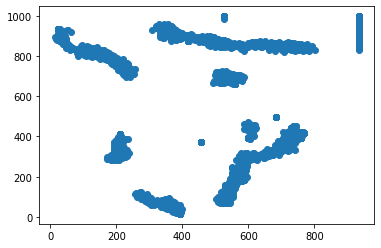

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df2['locationX'],df2['locationY'])

[Text(0.5, 1.0, 'Location plots of the Zebras')]

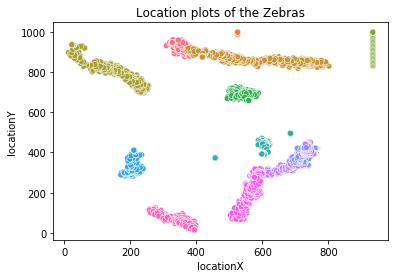

In [29]:
import seaborn as sns

sns.scatterplot(data=df2, x='locationX', y='locationY', hue='deviceId', legend=None).set(title='Location plots of the Zebras')

In [16]:
devices = ['62679c4c049d1b001d608aa1_18', 
           '62679c4c049d1b001d608aa1_19', 
           '62679c4c049d1b001d608aa1_20', 
           '62679c4c049d1b001d608aa1_21', 
           '62679c4c049d1b001d608aa1_22', 
           '62679c4c049d1b001d608aa1_23', 
           '62679c4c049d1b001d608aa1_24', 
           '62679c4c049d1b001d608aa1_25', 
           '62679c4c049d1b001d608aa1_26', 
           '62679c4c049d1b001d608aa1_28', 
           '62679c4c049d1b001d608aa1_29', 
           '62679c4c049d1b001d608aa1_30', 
           '62679c4c049d1b001d608aa1_31', 
           '62679c4c049d1b001d608aa1_32']

In [17]:
import math

for device in devices:
    tmp = df2[df2['deviceId'] == device]
    tmp['locationXp1'] = tmp['locationX'].shift(1)
    #tmp['locationXp1'][0] = tmp['locationX'][0]
    tmp['locationYp1'] = tmp['locationY'].shift(1)    
    #tmp['locationYp1'][0] = tmp['locationY'][0]
    tmp['timestamp2'] = tmp['timestamp'].shift(1)
    tmp['distance'] = pow(pow(tmp['locationYp1']-tmp['locationY'],2)+pow(tmp['locationXp1']-tmp['locationX'],2),1/2)
    tmp['speed'] = abs(tmp['distance'] / (tmp['timestamp2'] - tmp['timestamp']))
    #print(tmp)
    
    #break

/Users/yaolong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yaolong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/yaolong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [18]:
tmp

,deviceId,timestamp,pulseOxygenL,pulseOxygenH,locationX,locationY,temperature,locationXp1,locationYp1,timestamp2,distance,speed
3,62679c4c049d1b001d608aa1_32,148.16,150.0,95,84.02920,814.3874,22.88132,NaN,NaN,NaN,NaN,NaN
3,62679c4c049d1b001d608aa1_32,153.18,150.0,95,82.94078,815.0652,22.88038,84.02920,814.3874,148.16,1.282213,0.255421
3,62679c4c049d1b001d608aa1_32,158.20,150.0,95,80.47636,813.8866,22.88238,82.94078,815.0652,153.18,2.731751,0.544174
3,62679c4c049d1b001d608aa1_32,163.22,150.0,95,85.15763,801.5777,22.90185,80.47636,813.8866,158.20,13.169028,2.623312
3,62679c4c049d1b001d608aa1_32,168.24,150.0,95,91.30608,813.9526,22.88176,85.15763,801.5777,163.22,13.818162,2.752622
...,...,...,...,...,...,...,...,...,...,...,...,...
13,62679c4c049d1b001d608aa1_32,5293.64,150.0,95,22.96535,937.1180,22.81074,22.96522,937.1177,5288.62,0.000327,0.000065
13,62679c4c049d1b001d608aa1_32,5298.66,150.0,95,22.96549,937.1183,22.81074,22.96535,937.1180,5293.64,0.000331,0.000066
13,62679c4c049d1b001d608aa1_32,5303.68,150.0,95,22.96564,937.1186,22.81074,22.96549,937.1183,5298.66,0.000335,0.000067
13,62679c4c049d1b001d608aa1_32,5308.70,150.0,95,22.96578,937.1189,22.81074,22.96564,937.1186,5303.68,0.000331,0.000066


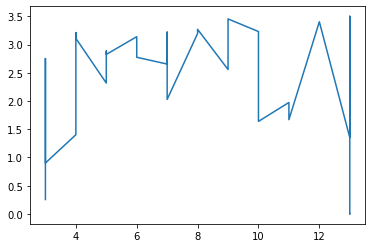

In [19]:
plt.plot(tmp['speed'])

In [20]:
import scipy

norm_cdf = scipy.stats.norm.cdf(tmp['speed']) # calculate the cdf - also discrete

# plot the cdf
#

/Users/yaolong/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/yaolong/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/yaolong/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [21]:
#sns.histplot(data=df2, y="locationY")

In [22]:
#sns.lineplot(x=tmp['speed'], y=norm_cdf)

Text(0.5, 1.0, 'CDF Plot of the movement speed of Zebras')

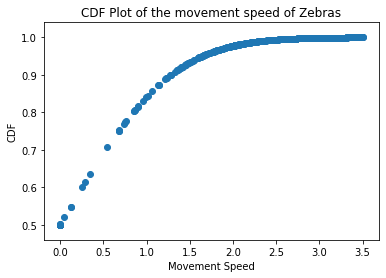

In [27]:
plt.scatter(tmp['speed'],norm_cdf)
plt.xlabel('Movement Speed')
plt.ylabel('CDF')
plt.title('CDF Plot of the movement speed of Zebras')

KeyboardInterrupt: 

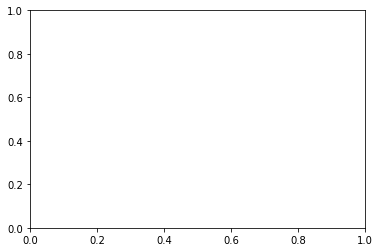

In [25]:
sns.histplot(data=df2, y="locationX")

In [ ]:
sns.histplot(data=df2, y="locationY")

[Text(0.5, 1.0, 'Location plots of the Zebras with color being the temps')]

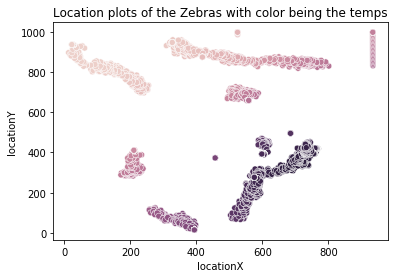

In [32]:
import seaborn as sns

sns.scatterplot(data=df2, x='locationX', y='locationY', hue='temperature', legend=None).set(title='Location plots of the Zebras with color being the temps')

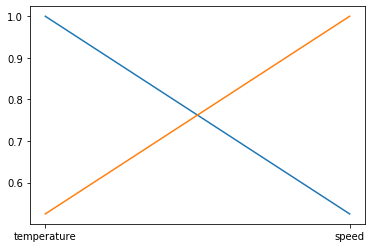

In [36]:
data = tmp[['temperature','speed']]
correlation = data.corr(method='pearson')
plt.plot(correlation)

[Text(0.5, 1.0, 'Correlation of Speed versus Temperature')]

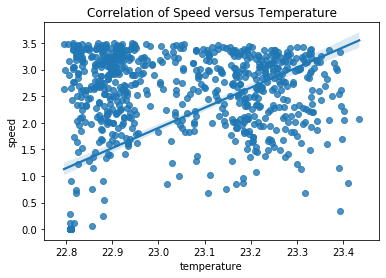

In [38]:
sns.regplot(x=tmp['temperature'],y=tmp['speed']).set(title='Correlation of Speed versus Temperature')